 You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.
In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.
(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.)
The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

# Instructions for completing the project
Step 1. Open the data file and study the general information

In [10]:
import pandas as pd
import numpy as np


data=pd.read_csv('C:\\Users\\igorm\\Downloads\\Games_project\\games.csv')

data.head(10)


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [11]:
pwd


'C:\\Users\\igorm\\Downloads\\Games_project'

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [13]:
data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9597,NBA 2K13,WiiU,2012.0,Sports,0.07,0.04,0.00,0.01,85.0,7,E
8323,World Driver Championship,N64,1999.0,Racing,0.14,0.03,0.00,0.00,NaN,NaN,NaN
3635,Catz,DS,2006.0,Simulation,0.49,0.02,0.00,0.04,NaN,5.3,E
16413,Musou Tourou,PSP,2009.0,Strategy,0.00,0.00,0.01,0.00,NaN,NaN,NaN
7762,New Love Plus,3DS,2012.0,Simulation,0.00,0.00,0.19,0.00,NaN,NaN,NaN


In [14]:
data.describe()
# our table is 16715 rows ( every row is a specific game) with 11 columns,
#column names are gonna turn to lowercase and will check for missing values
# and for duplicates as well

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [15]:
data.describe(include=['object'])#describe for categorical variables, and we can get some valuable info from this:
#most frequent genre is action, most frequent game is Need for speed, Sony PS2 is most frequent platform, and tbd
#(to be determined) is most frequent user_score value, and most frequent rating is E.

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [16]:
data['Year_of_Release'].unique()#checking for year of release column

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [17]:
# we are making all columns lowercase
data.columns = map(str.lower, data.columns)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [18]:
data.user_score=data.user_score.replace(to_replace="tbd",value="1")


In [19]:
data['user_score']=pd.to_numeric(data['user_score'])


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [21]:
data.genre.unique() # checking with unique if there are similiar genres that can be put togehter...

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [22]:
data.platform.unique()# geting familiar with platform types

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Wii','WiiU','GBA','GB','GC','N64','NES','DS','SNES','3DS'- Nintendo platforms, very old Japanese company dates from the mid seventies
'GEN','DC-dream cast''SAT-Saturn'- Sega games?

'TG16'-TurboGrafx-16- us based company from end eighties 

'X360','XB','XOne' - Microsoft platforms
 
'PS3', 'PS2','PS','PS4','PSP',PSV -  Sony platforms

'2600' - Atari platform, probably the oldest platform in the data

'PC'- Games designed for PC



  , 'SCD', 'WS', 'NG',  ,
 '3DO', 'GG', 'PCFX']

In [23]:
data.user_score.value_counts()

1.0    2426
7.8     324
8.0     290
8.2     282
8.3     254
       ... 
0.9       2
0.7       2
9.6       2
0.0       1
9.7       1
Name: user_score, Length: 95, dtype: int64

In [24]:
data.user_score.unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 1. , 8.8, 6.9, 9.4,
       6.8, 6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1,
       5.8, 5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1,
       3.5, 2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8,
       0. , 1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3,
       0.2, 0.6, 1.4, 0.9, 9.7])

In [25]:
data.user_score.fillna(0)

0        8.0
1        0.0
2        8.3
3        8.0
4        0.0
        ... 
16710    0.0
16711    0.0
16712    0.0
16713    0.0
16714    0.0
Name: user_score, Length: 16715, dtype: float64

In [26]:
data['user_score'].fillna(0)

0        8.0
1        0.0
2        8.3
3        8.0
4        0.0
        ... 
16710    0.0
16711    0.0
16712    0.0
16713    0.0
16714    0.0
Name: user_score, Length: 16715, dtype: float64

In [27]:
data.user_score.unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 1. , 8.8, 6.9, 9.4,
       6.8, 6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1,
       5.8, 5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1,
       3.5, 2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8,
       0. , 1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3,
       0.2, 0.6, 1.4, 0.9, 9.7])

In [28]:
print(data.user_score.value_counts()/len(data))
# we are seen here that tbd is represented with about 14 percent which is a lot and we cant dropp it 
# we need to check if its related to new games (to be determined)

1.0    0.145139
7.8    0.019384
8.0    0.017350
8.2    0.016871
8.3    0.015196
         ...   
0.9    0.000120
0.7    0.000120
9.6    0.000120
0.0    0.000060
9.7    0.000060
Name: user_score, Length: 95, dtype: float64


In [29]:
data[data.user_score=='tbd']['year_of_release'].value_counts()
#as we can see the most tbd values are in year of 2009 so we cant assume that this is because we have new 
#games that are waiting to be rated, so we are gonna leave it as it is, it cant be restored

C:\Users\igorm\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Series([], Name: year_of_release, dtype: int64)

In [30]:
data.isna().sum() #checking for missing values there is significant amount of those in scores and rating

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64


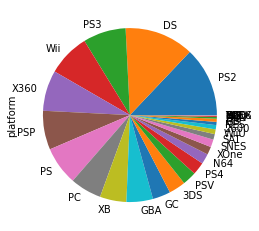

In [31]:
print(data.platform.value_counts())
(data.platform.value_counts()).plot(subplots=True,kind='pie');
#checking out for most popular platforms ,we can see that Sony PS2
#is most popular platform with over 2000 games and Nintendo DS is on the second place very close to PS2 
#then we have a gap of 1000 games less with sony PS3
#WII and X360 and PSP...

In [32]:
data['year_of_release']=data['year_of_release'].fillna(0).astype(int)
#print(games.head())
#converted float to int now we are good
## not in use,gonna convert to timedate 
##games['year_of_release']=pd.to_datetime(games['year_of_release'],format='%Y')

#games.head()


In [137]:
#removing month and day from datetime, we need only year
#games['year_of_release']=games['year_of_release'].dt.year
#games.head()

missing values in scores and ratings gonna keep asi it is since it can affect our results

now for example we have missing values in critic and user score and rating for Super Mario Bross which is obviously mistake

since we do have critic and score ratings for this particular game if we dig a little on the web...it could be possible to 

enter this values from The Entertainment Software Rating Board site, but it is way to complicated...so we are going to leave it 

as it is...

In [34]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [35]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])


Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.



In [36]:
#now we are going to make new column for total sales for every game

data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

#or by doing this
#games['total_sales']=games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38






# Step 3. Analyze the data



Look at how many games were released in different years.


Is the data for every period significant?


In order to get info on how many games were released every year we are usingg value_counts function applied 


to the year_of_release column

In [131]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
#data['year_of_release'].value_counts().reset_index()
df=data[['year_of_release','name']].groupby('year_of_release').count().sort_values(by='year_of_release').reset_index()
df
# so we can make conclusions that 2008,2009 and 2010 was the most productive years and eighties and begining of the
#nineties in general was much less ,we gonna plot some hists to make it more obvious...

,year_of_release,name
0,0,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15


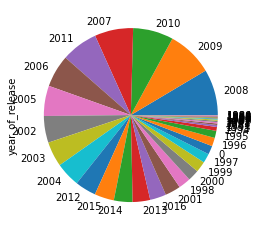

In [133]:
data['year_of_release'].value_counts().plot(subplots=True,kind='pie');

#simple solution for released games visualisation, from a pie we can clearly 

#see that most productive years are 2008,2009,and 2010

#in order to get more detalied visualisation we are going to build lolypop chart

In [134]:
df=df[df['year_of_release']!=0] #gonna remove columns with zeros

In [135]:
df.head()

,year_of_release,name
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14




Now we are going to make Lolypop Chart for Released Games so it will be very clearl visualy...



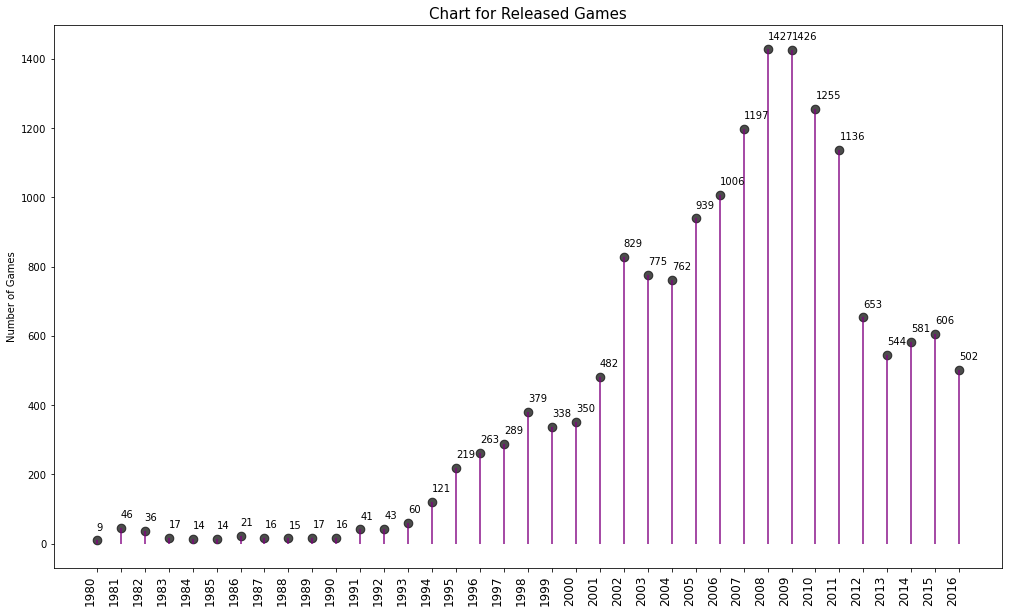

In [136]:
fig,ax=plt.subplots(figsize=(17,10))
ax.vlines(x=df.year_of_release, ymin=0, ymax=df.name, color='purple', alpha=0.7, linewidth=2)
ax.scatter(x=df.year_of_release, y=df.name, s=75,color='black', alpha=0.7)

ax.set_title('Chart for Released Games', fontdict={'size':15})
ax.set_ylabel('Number of Games')
ax.set_xticks(df.year_of_release)
ax.set_xticklabels(df.year_of_release, rotation=90, fontdict={'horizontalalignment':'right','size':12})

for row in df.itertuples():
    ax.text(row.year_of_release, row.name+30, s=round(row.name, 2))


here we see same results like in the pie chart with a difference that here we have a time 
dimension and everything looks much more undersandable to analyse trends in games sales...
we see clearly during the eighties sales were relativly low and from the start of the nineties 
and especialy end of ninetees there is a enormous grow in sales...that is the period when most 



in order to find best selling platforms in every region we will first take last ten years since we are not looking for
the best selling platform of all the time but for the curently most popular platform


In [43]:

data_2006=data[data.year_of_release>2006]


                          total_sales
platform year_of_release             
Wii      2009                  206.97
         2008                  171.32
X360     2010                  170.03
PS3      2011                  156.78
Wii      2007                  152.77


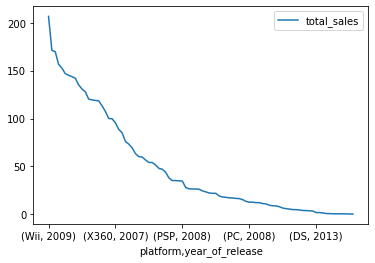

In [44]:
# we are going to find best seling platforms globaly and for every continent (na, eu, japan and other)

platforms_total_pivot=data_2006.pivot_table(index=('platform','year_of_release'),values='total_sales',aggfunc='sum').sort_values(by='total_sales', ascending=False)
print(platforms_total_pivot.head())
platforms_total_pivot.plot();
# best selling platforms globaly, is Wii from Nintendo

na_sales
platform year_of_release          
Wii      2009               114.55
X360     2010               107.38
Wii      2008                97.12
PS2      2004                96.78
         2002                96.54

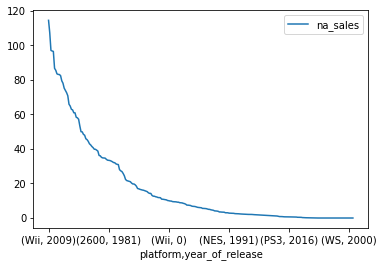

In [45]:
platforms_na_pivot=data.pivot_table(index=('platform','year_of_release'),values='na_sales',aggfunc='sum').sort_values(by='na_sales', ascending=False)
platforms_na_pivot.plot();
platforms_na_pivot.head()
#checking for best selling platform in North America is Nintendo Wii which is home gaming console released in 2006

jp_sales
platform year_of_release          
DS       2007                26.81
         2009                24.21
         2008                24.01
3DS      2013                23.57
         2014                20.69

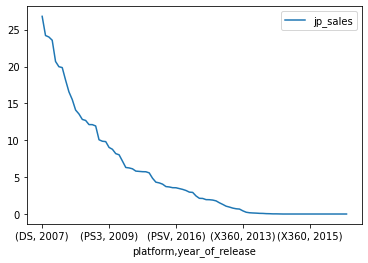

In [46]:
platforms_jp_pivot=data_2006.pivot_table(index=('platform','year_of_release'),values='jp_sales',aggfunc='sum').sort_values(by='jp_sales', ascending=False)
platforms_jp_pivot.plot();
platforms_jp_pivot.head()
# in japan most popular gaming console is DS which is portable gaming console... 

other_sales
platform year_of_release             
PS2      2007                   23.69
PS3      2011                   21.56
         2010                   20.81
PS2      2008                   19.31
PS4      2015                   18.46

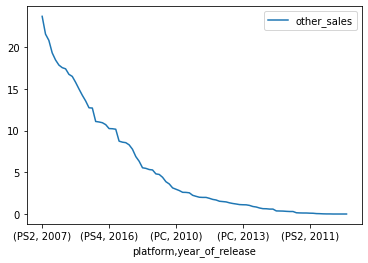

In [47]:
platforms_other_pivot=data_2006.pivot_table(index=('platform','year_of_release'),values='other_sales',aggfunc='sum').sort_values(by='other_sales', ascending=False)
platforms_other_pivot.plot();
platforms_other_pivot.head()
#in the rest of the world most selling platform is ps2

In [48]:
# best selling games in total sales
data_2006.nlargest(5,['total_sales'])
#from the table bellow we can see that the best seling game in the world is Mario KArt Wii

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


In [49]:
#worst selling games in total sales
data_2006.nsmallest(5,['total_sales'])
#worst selling game in worlwide market is G1 Jockey 4 2008...

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.0,0.0,NaN,NaN,NaN,0.00
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.0,0.0,NaN,NaN,NaN,0.00
15384,Order of War,PC,2009,Strategy,0.00,0.01,0.0,0.0,69.0,7.3,T,0.01
15486,Arslan: The Warriors of Legend,XOne,2016,Action,0.01,0.00,0.0,0.0,NaN,5.8,T,0.01
15597,Ratchet & Clank Collection,PSV,2014,Action,0.00,0.01,0.0,0.0,NaN,NaN,NaN,0.01


In [50]:
# best selling game  for North America sales
data_2006.nlargest(5,['na_sales'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62


In [51]:
#oposite of nlargest is nsmallest, determine the games with lowest sales for NA sales
data_2006.nsmallest(5,['na_sales'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.0,0.0,4.87,0.0,NaN,NaN,NaN,4.87
340,Friend Collection,DS,2009,Misc,0.0,0.0,3.67,0.0,NaN,NaN,NaN,3.67
385,Monster Hunter 4,3DS,2013,Role-Playing,0.0,0.0,3.44,0.0,NaN,NaN,NaN,3.44
563,Yokai Watch 2 Shinuchi,3DS,2014,Role-Playing,0.0,0.0,2.68,0.0,NaN,NaN,NaN,2.68
694,Yokai Watch Busters,3DS,2015,Action,0.0,0.0,2.29,0.0,NaN,NaN,NaN,2.29


In [52]:
data_2006.nlargest(5,['eu_sales'])#five best selling games in europe

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70


In [53]:
data_2006.nsmallest(5,['eu_sales'])# five worst selling games in eu

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.00,0.0,4.87,0.00,NaN,NaN,NaN,4.87
340,Friend Collection,DS,2009,Misc,0.00,0.0,3.67,0.00,NaN,NaN,NaN,3.67
349,Pro Evolution Soccer 2008,PS2,2007,Sports,0.05,0.0,0.64,2.93,82.0,7.9,E,3.62
385,Monster Hunter 4,3DS,2013,Role-Playing,0.00,0.0,3.44,0.00,NaN,NaN,NaN,3.44
412,Yokai Watch 2 Ganso/Honke,3DS,2014,Role-Playing,0.09,0.0,3.18,0.01,NaN,NaN,NaN,3.28


In [54]:
data_2006.nlargest(5,['jp_sales'])#no1 best seller in Japan is Pokemon and that is obviously since the game is Japanese

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.00,0.00,4.87,0.00,NaN,NaN,NaN,4.87
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
73,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E,9.17
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60


In [55]:
data_2006.nsmallest(5,['jp_sales'])#five games with lowest sales in Japan

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
61,Just Dance 3,Wii,2011,Misc,5.95,3.11,0.0,1.06,74.0,7.8,E10+,10.12
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.0,0.60,86.0,7.6,T,8.01
100,Call of Duty: World at War,X360,2008,Shooter,4.81,1.88,0.0,0.69,84.0,7.6,M,7.38
103,Just Dance,Wii,2009,Misc,3.48,2.99,0.0,0.73,49.0,8.0,E10+,7.20
116,Just Dance 4,Wii,2012,Misc,4.05,2.16,0.0,0.55,74.0,7.3,E10+,6.76





Look at how sales varied from platform to platform.

Choose the platforms with the greatest total sales and build a distribution based on data for each year. 

Find platforms that used to be popular but now have zero sales.

How long does it generally take for new platforms to appear and old ones to fade?



Now we will make some visualisations to answer the question how sales varied from platform to platfform...

In [56]:
#z score
df=data[['platform','total_sales']].groupby('platform').sum().sort_values(by='total_sales').reset_index()
df.head(10)


,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,30.77
9,SAT,33.59


In [57]:
df['sales_z']=(df['total_sales']-df['total_sales'].mean())/df['total_sales'].std()

In [58]:
df.head()

,platform,total_sales,sales_z
0,PCFX,0.03,-0.825980
1,GG,0.04,-0.825952
2,3DO,0.10,-0.825779
3,TG16,0.16,-0.825607
4,WS,1.42,-0.821988


In [59]:
df['colors']=['red' if x<0 else 'green'for x in df['sales_z']]
df.head()

,platform,total_sales,sales_z,colors
0,PCFX,0.03,-0.825980,red
1,GG,0.04,-0.825952,red
2,3DO,0.10,-0.825779,red
3,TG16,0.16,-0.825607,red
4,WS,1.42,-0.821988,red


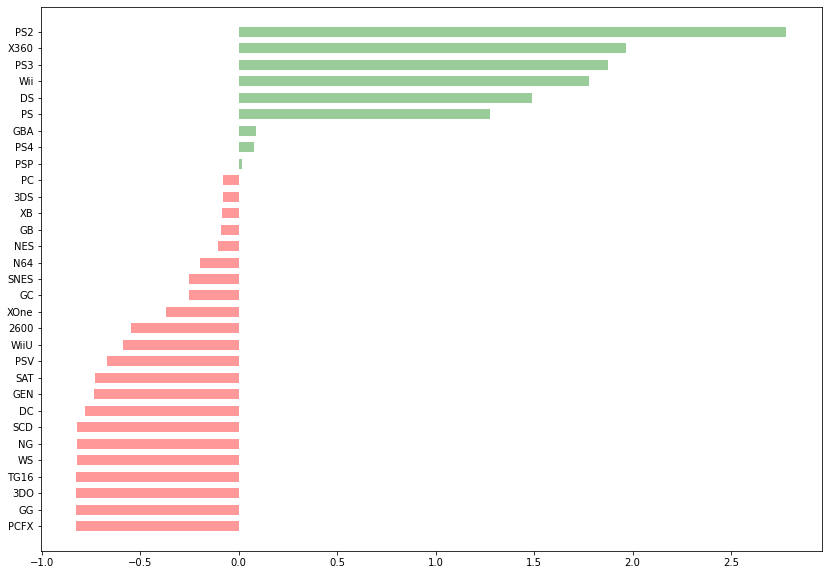

In [60]:
plt.figure(figsize=(14,10))
plt.hlines(y=df.platform, xmin=0, xmax=df.sales_z, colors=df.colors,alpha=0.4,linewidth=10);

we can clearly see from the graph that five most selling platforms are X360,PS2, Wii, PS3 and DS... 


Which platforms are leading in sales?

In [61]:
import seaborn as sns

In [62]:
!pip install squarify
import squarify

In [63]:
df_tree=data[['platform','total_sales']].groupby('platform').sum().sort_values(by='total_sales').reset_index()
df_tree=df_tree[df_tree['total_sales']!=0]

In [64]:
df_tree

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,30.77
9,SAT,33.59


In [65]:
sizes=df_tree.total_sales.tolist()

In [66]:
sizes

[0.03,
 0.04,
 0.1,
 0.16,
 1.42,
 1.4400000000000004,
 1.8600000000000003,
 15.95,
 30.770000000000003,
 33.59000000000002,
 54.070000000000135,
 82.19,
 96.98000000000003,
 159.32,
 198.93000000000066,
 200.04000000000022,
 218.67999999999984,
 251.0499999999999,
 255.4599999999999,
 257.7399999999991,
 258.99999999999864,
 259.5199999999979,
 294.0499999999952,
 314.1399999999991,
 317.84999999999854,
 730.8599999999957,
 806.119999999985,
 907.5099999999959,
 939.6499999999982,
 971.419999999998,
 1255.7699999999925]

In [67]:
labels=df_tree.apply(lambda x: str(x[0])+"\n"+"$"+str(round(x[1])),axis=1)

In [68]:
labels

0       PCFX\n$0
1         GG\n$0
2        3DO\n$0
3       TG16\n$0
4         WS\n$1
5         NG\n$1
6        SCD\n$2
7        DC\n$16
8       GEN\n$31
9       SAT\n$34
10      PSV\n$54
11     WiiU\n$82
12     2600\n$97
13    XOne\n$159
14      GC\n$199
15    SNES\n$200
16     N64\n$219
17     NES\n$251
18      GB\n$255
19      XB\n$258
20     3DS\n$259
21      PC\n$260
22     PSP\n$294
23     PS4\n$314
24     GBA\n$318
25      PS\n$731
26      DS\n$806
27     Wii\n$908
28     PS3\n$940
29    X360\n$971
30    PS2\n$1256
dtype: object

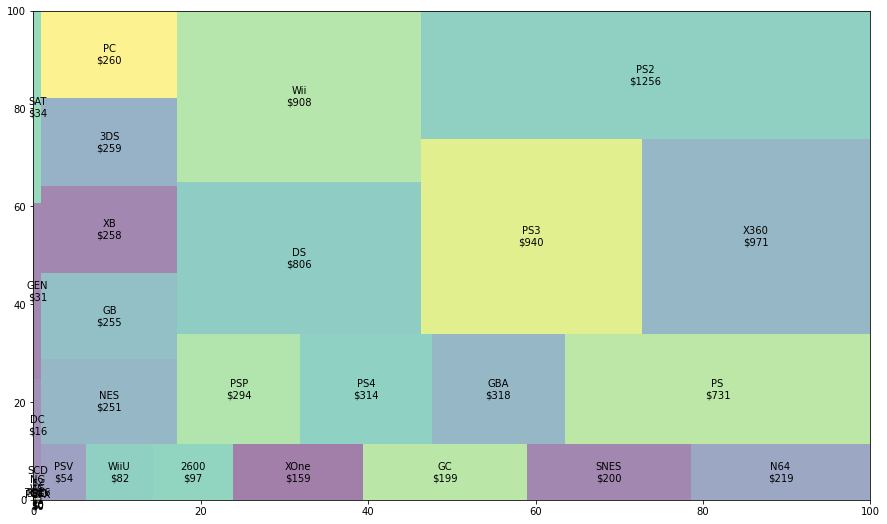

In [69]:
plt.figure(figsize=(15,9))
squarify.plot(sizes=sizes,label=labels, alpha=.5);

this is how are market  distributions looks like we can se that top seller are :PS2, X360,PS3, Wii, DS 

 Which ones are growing or shrinking? Select several potentially profitable platforms.

In [70]:
#gonna build first subset of data with data from the year 2000 only:

data_2000=data[data.year_of_release>2000]

In [71]:
#now we gonna create pivot table for each year
df=pd.pivot_table(data_2000, index='year_of_release',columns='platform',values='total_sales',aggfunc=sum,fill_value=0)
df.head()

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,
2001,0.0,1.07,0.00,9.24,61.53,26.34,3.25,5.47,35.59,166.43,0.0,0.0,0.00,0.0,0.28,0.0,0.0,0.00,22.26,0.0
2002,0.0,0.29,0.00,0.00,74.16,51.81,0.08,8.57,6.67,205.38,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,48.01,0.0
2003,0.0,0.00,0.00,0.00,56.67,50.61,0.00,8.84,2.07,184.31,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,55.04,0.0
2004,0.0,0.00,17.27,0.00,77.91,28.82,0.00,10.39,0.00,211.81,0.0,0.0,7.06,0.0,0.00,0.0,0.0,0.00,65.42,0.0
2005,0.0,0.00,130.14,0.00,33.86,27.62,0.00,4.37,0.00,160.66,0.0,0.0,43.84,0.0,0.00,0.0,0.0,8.25,49.08,0.0


In [72]:
df

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,
2001,0.00,1.07,0.00,9.24,61.53,26.34,3.25,5.47,35.59,166.43,0.00,0.00,0.00,0.00,0.28,0.00,0.00,0.00,22.26,0.00
2002,0.00,0.29,0.00,0.00,74.16,51.81,0.08,8.57,6.67,205.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,48.01,0.00
2003,0.00,0.00,0.00,0.00,56.67,50.61,0.00,8.84,2.07,184.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,55.04,0.00
2004,0.00,0.00,17.27,0.00,77.91,28.82,0.00,10.39,0.00,211.81,0.00,0.00,7.06,0.00,0.00,0.00,0.00,0.00,65.42,0.00
2005,0.00,0.00,130.14,0.00,33.86,27.62,0.00,4.37,0.00,160.66,0.00,0.00,43.84,0.00,0.00,0.00,0.00,8.25,49.08,0.00
2006,0.00,0.00,119.81,0.00,5.28,11.26,0.00,2.85,0.00,103.42,20.96,0.00,55.32,0.00,0.00,137.15,0.00,51.62,10.04,0.00
2007,0.00,0.02,146.94,0.00,3.40,0.27,0.00,9.28,0.00,75.99,73.19,0.00,46.93,0.00,0.00,152.77,0.00,95.41,0.55,0.00
2008,0.00,0.04,145.31,0.00,0.00,0.00,0.00,12.42,0.00,53.90,118.52,0.00,34.55,0.00,0.00,171.32,0.00,135.26,0.18,0.00
2009,0.00,0.00,119.54,0.00,0.00,0.00,0.00,16.91,0.00,26.40,130.93,0.00,37.78,0.00,0.00,206.97,0.00,120.29,0.00,0.00


In [73]:
df.shift(+1).head()

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,0.0,1.07,0.00,9.24,61.53,26.34,3.25,5.47,35.59,166.43,0.0,0.0,0.00,0.0,0.28,0.0,0.0,0.0,22.26,0.0
2003,0.0,0.29,0.00,0.00,74.16,51.81,0.08,8.57,6.67,205.38,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,48.01,0.0
2004,0.0,0.00,0.00,0.00,56.67,50.61,0.00,8.84,2.07,184.31,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,55.04,0.0
2005,0.0,0.00,17.27,0.00,77.91,28.82,0.00,10.39,0.00,211.81,0.0,0.0,7.06,0.0,0.00,0.0,0.0,0.0,65.42,0.0


In [74]:
df.shift(+1,axis=1).head()

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,
2001,NaN,0.0,1.07,0.00,9.24,61.53,26.34,3.25,5.47,35.59,166.43,0.0,0.0,0.00,0.0,0.28,0.0,0.0,0.00,22.26
2002,NaN,0.0,0.29,0.00,0.00,74.16,51.81,0.08,8.57,6.67,205.38,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,48.01
2003,NaN,0.0,0.00,0.00,0.00,56.67,50.61,0.00,8.84,2.07,184.31,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,55.04
2004,NaN,0.0,0.00,17.27,0.00,77.91,28.82,0.00,10.39,0.00,211.81,0.0,0.0,7.06,0.0,0.00,0.0,0.0,0.00,65.42
2005,NaN,0.0,0.00,130.14,0.00,33.86,27.62,0.00,4.37,0.00,160.66,0.0,0.0,43.84,0.0,0.00,0.0,0.0,8.25,49.08


In [75]:
dynamics=df-df.shift(+1)

In [76]:
dynamics.tail()

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,
2012,-11.84,0.0,-15.17,0.0,0.0,0.0,0.0,-11.81,0.0,-0.45,-49.42,0.00,-10.13,11.56,0.0,-37.94,17.56,-44.10,0.0,0.00
2013,5.21,0.0,-9.47,0.0,0.0,0.0,0.0,-10.84,0.0,0.00,5.89,25.99,-4.55,-5.60,0.0,-13.12,4.09,-11.16,0.0,18.96
2014,-12.81,0.0,-1.54,0.0,0.0,0.0,0.0,0.90,0.0,0.00,-65.49,74.01,-2.90,1.31,0.0,-4.84,0.38,-53.84,0.0,35.11
2015,-15.98,0.0,0.00,0.0,0.0,0.0,0.0,-4.76,0.0,0.00,-30.94,18.90,-0.12,-5.65,0.0,-2.61,-5.68,-22.78,0.0,6.07
2016,-12.64,0.0,0.00,0.0,0.0,0.0,0.0,-3.27,0.0,0.00,-13.22,-49.65,-0.12,-2.00,0.0,-0.96,-11.75,-10.44,0.0,-33.99


In [77]:
dynamics.T

year_of_release,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,
3DS,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.20,-11.84,5.21,-12.81,-15.98,-12.64
DC,NaN,-0.78,-0.29,0.00,0.00,0.00,0.02,0.02,-0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DS,NaN,0.00,0.00,17.27,112.87,-10.33,27.13,-1.63,-25.77,-34.52,-58.84,-15.17,-9.47,-1.54,0.00,0.00
GB,NaN,-9.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GBA,NaN,12.63,-17.49,21.24,-44.05,-28.58,-1.88,-3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,NaN,25.47,-1.20,-21.79,-1.20,-16.36,-10.99,-0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
N64,NaN,-3.17,-0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PC,NaN,3.10,0.27,1.55,-6.02,-1.52,6.43,3.14,4.49,7.37,10.75,-11.81,-10.84,0.90,-4.76,-3.27
PS,NaN,-28.92,-4.60,-2.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


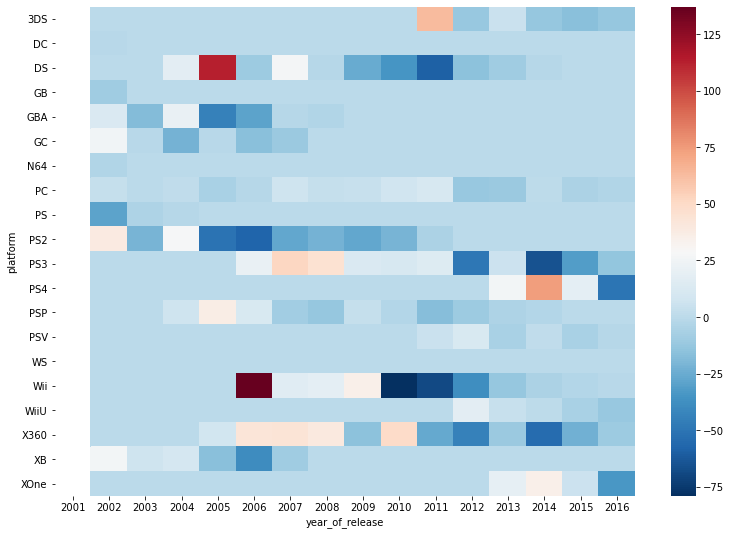

In [78]:
plt.figure(figsize=(13,9))
sns.heatmap(dynamics.T, cmap='RdBu_r');

In [79]:
#from a thermograph we can clearly see that two main platforms that are going very good are PS4 and XboxOne
# they should be considered as worth investment in next year

Build a box plot for the global sales of all games, broken down by platform.

Are the differences in sales significant? What about average sales on various platforms? 

Describe your findings.

In [80]:
groups=data_2000.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()

In [81]:
groups.head()

,platform,year_of_release,total_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78


In [82]:
ordered=groups.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']

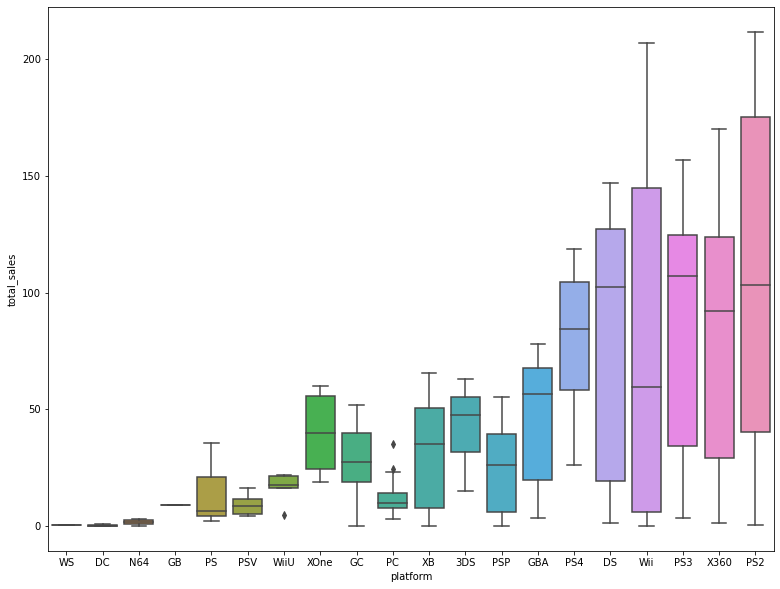

In [84]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform',y='total_sales',data=groups, order=ordered);

In [85]:
#as we can se from the boxplot Sony's platforms showing higher medians over the years
# Microsoft x360 has lower medians and lower values but more sucsesfull 

I would like to make further investigation in checking trends in sales for five most profitable platforms:
PS2,PS4,XBox360,Wii and DS

                          total_sales
platform year_of_release             
DS       0                       3.34
         1985                    0.02
         2004                   17.27
         2005                  130.14
         2006                  119.81
         2007                  146.94
         2008                  145.31
         2009                  119.54
         2010                   85.02
         2011                   26.18


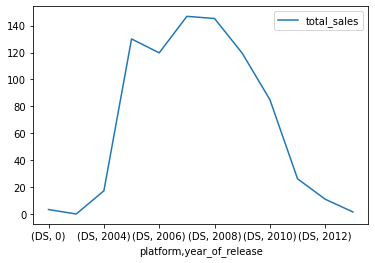

In [86]:
ds_pivot=(data.query('platform=="DS"').pivot_table(index=('platform','year_of_release'),values='total_sales',aggfunc='sum'))
print(ds_pivot.head(10))
ds_pivot.plot();
#we can see that DS is not so good it has its peak of sales somwhere arround 2007 and 2008 but right now is very low

                          total_sales
platform year_of_release             
PS2      0                      22.21
         2000                   39.17
         2001                  166.43
         2002                  205.38
         2003                  184.31
         2004                  211.81
         2005                  160.66
         2006                  103.42
         2007                   75.99
         2008                   53.90


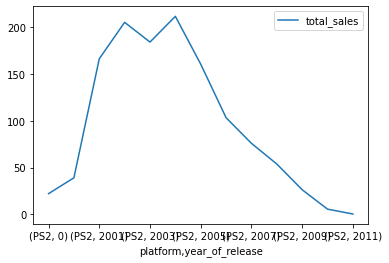

In [87]:
ps2_pivot=(data.query('platform=="PS2"').pivot_table(index=('platform','year_of_release'),values='total_sales',aggfunc='sum'))
print(ps2_pivot.head(10))
ps2_pivot.plot();
#same thing with ps2 which is on the other side obvious since its relatively old platform,(from 2000)
#that has been replaced with PS3 and PS4

                          total_sales
platform year_of_release             
Wii      0                      16.33
         2006                  137.15
         2007                  152.77
         2008                  171.32
         2009                  206.97
         2010                  127.95
         2011                   59.65
         2012                   21.71
         2013                    8.59
         2014                    3.75


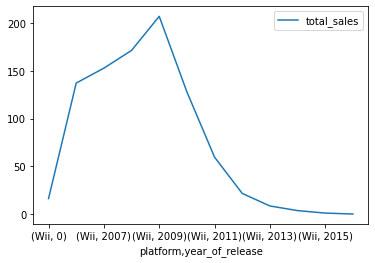

In [88]:
wii_pivot=(data.query('platform=="Wii"').pivot_table(index=('platform','year_of_release'),values='total_sales',aggfunc='sum'))
print(wii_pivot.head(10))
wii_pivot.plot();
# in total sales Wii is not so good, platform reached its peak somwhere arround 2010 and from that it sales are falling constantly

                          total_sales
platform year_of_release             
X360     0                      10.18
         2005                    8.25
         2006                   51.62
         2007                   95.41
         2008                  135.26
         2009                  120.29
         2010                  170.03
         2011                  143.84
         2012                   99.74
         2013                   88.58


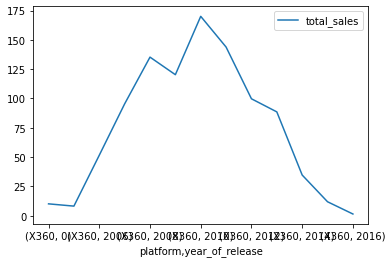

In [89]:
x360_pivot=(data.query('platform=="X360"').pivot_table(index=('platform','year_of_release'),values='total_sales',aggfunc='sum'))
print(x360_pivot.head(10))
x360_pivot.plot();
# according to this graph x360 has reached its peak in 2010 and since then its rapidly fallin down, looks like it loosing
#a race with more competitive platforms like PS4, MIcrosoft has also announced that they are leaving the race in game platforms and 
# looking for more investments in Netflix and other similiar sources

                          total_sales
platform year_of_release             
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25


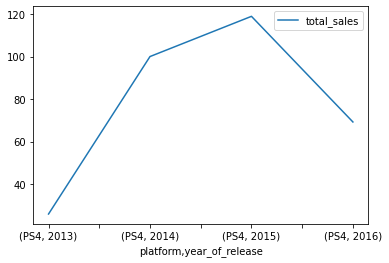

In [90]:
ps4_pivot=(data.query('platform=="PS4"').pivot_table(index=('platform','year_of_release'),values='total_sales',aggfunc='sum'))
print(ps4_pivot.head(10))
ps4_pivot.plot();
#PS4 still looks good,all the other platforms looks that they falling down very fast, PS4  
#has as a drop since a peak in 2015 but 2016 it still somewhere around 70 millions
# this one is that should be take into account for invest in 2017, 
#no matter if its falling still have potential
#My conclusion is that PS4 is the best platform to invest in next year

as a general conclusion about how much time it take for a platform to lose popularity it various from platform to platform but in general we can say its around 7-9 years...some platforms made big sales from a start probably due to good marketing campaign before launching same platform.for example Wii has started with very high sales oposite to the most of the others
As a general conclusion we can say that PS4 is definetly our ULTIMATE WINNER worth to take a look in the next year as well

In [91]:
#gamesofps4=data[data['platform']=='PS4']['name'].value_counts().index.tolist()
#gamesofps4

In [92]:
#listofsales=data.query('year_of_release==2016').pivot_table(index=('platform','year_of_release'),values='total_sales',aggfunc='sum').sort_values(by='total_sales', ascending=False)
#listofsales.plot(subplots=True,kind='pie');
#list of games selled by platforms for 2016

Take a look at how user and professional reviews affect sales for one popular platform (you choose).
Build a scatter plot and calculate the correlation between reviews and sales. 
Draw conclusions.

In [93]:
#In order to anser this I will choose PS4


In [94]:
# first of all we will make dataset with only ps4 in platform
data_ps4=data[data.platform=='PS4']
data_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [95]:
ps4grouped=data_ps4.groupby(['critic_score','user_score'])['total_sales'].sum().reset_index()

In [96]:
ps4grouped.sort_values(by='total_sales', ascending=False).head()

,critic_score,user_score,total_sales
230,97.0,8.3,12.62
181,82.0,4.3,8.58
188,83.0,5.7,7.66
199,85.0,5.0,7.60
211,87.0,6.5,7.17


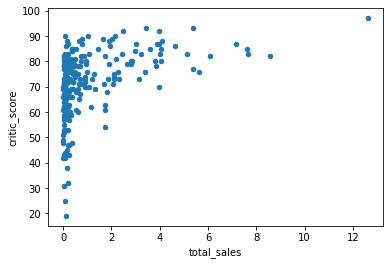

In [97]:
ps4grouped.plot.scatter(x='total_sales',y='critic_score');

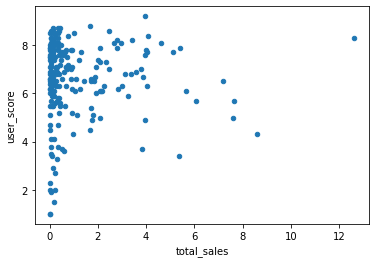

In [98]:
ps4grouped.plot.scatter(x='total_sales',y='user_score');
#for user score we cant make plot since there is too many missing data

<div class="alert alert-info">
    Even on the PS4?
</div>

In [99]:
print(data[['critic_score','total_sales']].corr())
print(data[['user_score','total_sales']].corr())


              critic_score  total_sales
critic_score      1.000000     0.245507
total_sales       0.245507     1.000000
             user_score  total_sales
user_score      1.00000      0.16631
total_sales     0.16631      1.00000


according to our calculations there is no strong corelation between critic score and total sales, sales are not affected by critic scores  or at least at some important level
same goes for user score, there is no corelation between user score and total sales

Keeping your conclusions in mind, compare the sales of the same games on other platforms.

Take a look at the general distribution of games by genre. What can we say about the most profitable genres?

Can you generalize about genres with high and low sales?

In [100]:
#We are going to take a look at the five best selling games and compare them on the other platforms

In [101]:
data.nlargest(7,['total_sales'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80


In [102]:
data_mario=data[data.name=='Super Mario Bros.']
data_mario.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
201,Super Mario Bros.,GB,1999,Platform,3.40,1.30,0.15,0.22,NaN,NaN,NaN,5.07


In [103]:
data.head(10)
#the most profitable genres are Sports, Platform and Racing

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [104]:
data.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN,0.01
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01


we cannot make any generalizations about genres and sales, the same genres also records low sales

Step 4. 

Create a user profile for each region

For each region (NA, EU, JP), determine:

The top five platforms. Describe variations in their market shares from region to region.

The top five genres. Explain the difference.

Do ESRB ratings affect sales in individual regions?

,na_sales
platform,
X360,553.68
Wii,416.01
PS3,381.29
DS,273.98
PS4,108.74


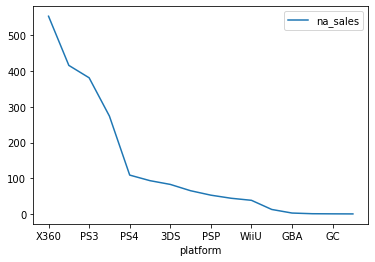

In [105]:
#best seling platform in North America
platforms_na_pivot=data_2006.pivot_table(index=('platform'),values='na_sales',aggfunc='sum').sort_values(by='na_sales', ascending=False)
platforms_na_pivot.plot();
platforms_na_pivot.head()
#best selling platform in us is Wii, then comes X360 

<div class="alert alert-info">
    Again, not sure what this plot is supposed to show.
</div>

they show best selling platforms in na, eu jp and rest of the world

In [106]:
games_na_pivot=data_2006.pivot_table(index=('platform','genre'),values='na_sales',aggfunc='sum').sort_values(by='na_sales', ascending=False)

games_na_pivot.head(15)

# best selling genres in North America are : Shooter, Action, Sport, Misc and Simulation

na_sales
platform genre                 
X360     Shooter         160.59
         Action          132.91
PS3      Action          119.95
Wii      Sports          105.45
         Misc            100.33
X360     Sports           80.93
PS3      Shooter          79.52
X360     Misc             61.36
Wii      Action           59.06
PS3      Sports           59.02
DS       Action           54.86
         Simulation       47.31
Wii      Platform         46.54
DS       Misc             43.57
X360     Role-Playing     38.72

In [107]:
#best seling platform in EU
platforms_eu_pivot=data_2006.pivot_table(index=('platform','year_of_release'),values='eu_sales',aggfunc='sum').sort_values(by='eu_sales', ascending=False)

platforms_eu_pivot.head()
#best selling platform in us is Wii, PS3, and PS4

,,eu_sales
platform,year_of_release,
Wii,2009,58.31
PS3,2011,56.24
PS4,2015,51.76
PS3,2010,50.50
Wii,2008,46.52


In [108]:
games_eu_pivot=data_2006.pivot_table(index=('platform','genre'),values='eu_sales',aggfunc='sum').sort_values(by='eu_sales', ascending=False)

games_eu_pivot.head(20)

#best selling games genres in europe are: action,shooter,sports , misc and racing

eu_sales
platform genre               
PS3      Action        104.32
X360     Action         70.87
         Shooter        70.54
PS3      Shooter        70.26
Wii      Sports         64.70
         Misc           53.21
PS3      Sports         45.91
PS4      Action         42.71
         Shooter        39.16
X360     Sports         34.37
PS3      Racing         29.00
Wii      Action         27.02
PS4      Sports         25.98
DS       Action         24.51
X360     Racing         23.60
Wii      Platform       23.47
DS       Puzzle         19.56
PC       Simulation     19.54
X360     Misc           19.45
DS       Misc           19.17

In [109]:
#best seling platform in Japan
platforms_jp_pivot=data_2006.pivot_table(index=('platform','year_of_release'),values='jp_sales',aggfunc='sum').sort_values(by='jp_sales', ascending=False)

platforms_jp_pivot.head()
#best selling platform in Japan is DS and 3DS which is very oposite to the rest of the world, 
#since those are small portable platforms

jp_sales
platform year_of_release          
DS       2007                26.81
         2009                24.21
         2008                24.01
3DS      2013                23.57
         2014                20.69

In [110]:
games_jp_pivot=data_2006.pivot_table(index=('platform','genre'),values='jp_sales',aggfunc='sum').sort_values(by='jp_sales', ascending=False)

games_jp_pivot.head()

# according to best selling games in Japan we can make conclusions that in Japan the 
#most popular genre is Role Playing and Platforms and Simulation

,,jp_sales
platform,genre,
3DS,Role-Playing,41.96
DS,Role-Playing,41.40
PS3,Action,28.78
PSP,Role-Playing,28.33
3DS,Action,22.66


As a conclusion we can say that while joying most of the world looking for home gaming platforms, in Japan the best selling platforms are portable small gaming platforms, and that is mostly affected by way of living in Japan, 
where people are taking games to the public transport and where ever they are planing to go, while the rest of the worl enjoying to play games at home...


In [111]:
#now we will find top 5 genres for different regions

In [112]:
genre_total_pivot=data_2006.pivot_table(index=('platform','genre'),values='total_sales',aggfunc='sum').sort_values(by='total_sales', ascending=False)
genre_total_pivot.head(20)

total_sales
platform genre                    
PS3      Action             296.95
X360     Shooter            256.77
         Action             226.75
Wii      Sports             202.67
PS3      Shooter            186.43
Wii      Misc               179.63
PS3      Sports             130.73
X360     Sports             126.31
Wii      Action              98.50
DS       Action              98.34
PS4      Action              96.10
DS       Role-Playing        92.32
         Misc                89.22
X360     Misc                88.68
PS4      Shooter             88.56
Wii      Platform            88.13
3DS      Role-Playing        84.20
DS       Simulation          77.56
PS3      Role-Playing        73.07
         Racing              64.08

5 best selling genres in total sales are:Action, Shooter,Sports, Misc,Role_Playing

In [113]:
#top 5 genres in NA
genre_na_pivot=data_2006.pivot_table(index=('platform','genre'),values='na_sales',aggfunc='sum').sort_values(by='na_sales', ascending=False)
genre_na_pivot.head(15)

na_sales
platform genre                 
X360     Shooter         160.59
         Action          132.91
PS3      Action          119.95
Wii      Sports          105.45
         Misc            100.33
X360     Sports           80.93
PS3      Shooter          79.52
X360     Misc             61.36
Wii      Action           59.06
PS3      Sports           59.02
DS       Action           54.86
         Simulation       47.31
Wii      Platform         46.54
DS       Misc             43.57
X360     Role-Playing     38.72

Top 5 genres in NA market: Shooter, Action, Sport, Misc,Simulation

In [114]:
#top 5 genres in Japan
genre_jp_pivot=data_2006.pivot_table(index=('platform','genre'),values='jp_sales',aggfunc='sum').sort_values(by='jp_sales', ascending=False)
genre_jp_pivot.head(15)

jp_sales
platform genre                 
3DS      Role-Playing     41.96
DS       Role-Playing     41.40
PS3      Action           28.78
PSP      Role-Playing     28.33
3DS      Action           22.66
DS       Misc             20.36
PS3      Role-Playing     16.77
Wii      Sports           14.41
         Platform         11.24
DS       Action           10.99
PSP      Action           10.69
Wii      Misc             10.56
3DS      Simulation       10.39
PS3      Shooter           8.63
         Sports            7.92

From the pivot we can make following conclusions that 5 top selling genres in Japan are:
Role_playing, Action, MIsc, Sport, Platform

In [115]:
#top 5 genres in rest of the world
genre_other_pivot=data_2006.pivot_table(index=('platform','genre'),values='other_sales',aggfunc='sum').sort_values(by='other_sales', ascending=False)
genre_other_pivot.head(15)

other_sales
platform genre               
PS3      Action         43.90
         Shooter        28.02
X360     Shooter        22.94
         Action         20.46
Wii      Sports         18.11
PS3      Sports         17.88
PS2      Sports         16.13
Wii      Misc           15.53
PS4      Action         14.66
         Shooter        13.93
PS2      Misc           12.41
         Action         11.90
PS3      Racing         10.93
X360     Sports         10.72
PS4      Sports          8.86

From the pivot we can make conclusions that in the rest of the world five most popular genres are:
Action, Shooter, Sports, Misc,Racing

Step 5. Test the following hypotheses:

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the alpha threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What significance level you chose to test the hypotheses, and why

Step 6. Write a general conclusion

In [116]:
# first we need to make our data 
data_xone=data[data.platform=='XOne']

In [117]:
data['user_score']=data['user_score'].fillna(data['user_score'].mean())# gonna fill nans with mean 

In [118]:
data.user_score.value_counts()

5.642411    6701
1.000000    2426
7.800000     324
8.000000     290
8.200000     282
            ... 
2.300000       2
1.300000       2
9.600000       2
0.000000       1
9.700000       1
Name: user_score, Length: 96, dtype: int64

In [119]:
data_xone.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22


In [120]:
data_xone.user_score.mean() #calcualting mean for the xone user_score

6.2067357512953345

In [121]:
data_pc=data[data.platform=='PC']
data_pc.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.0,0.60,86.0,7.600000,T,8.01
138,World of Warcraft,PC,2004,Role-Playing,0.08,6.21,0.0,0.00,93.0,7.300000,T,6.29
192,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.0,0.54,88.0,4.000000,M,5.14
195,Microsoft Flight Simulator,PC,1996,Simulation,3.22,1.69,0.0,0.20,NaN,5.642411,NaN,5.11
218,StarCraft II: Wings of Liberty,PC,2010,Strategy,2.57,1.68,0.0,0.58,93.0,8.200000,T,4.83


In [122]:
data_pc.user_score.mean()

6.5314924506102505

In [123]:
data.user_score.value_counts()

5.642411    6701
1.000000    2426
7.800000     324
8.000000     290
8.200000     282
            ... 
2.300000       2
1.300000       2
9.600000       2
0.000000       1
9.700000       1
Name: user_score, Length: 96, dtype: int64

In [124]:
data_action=data[data.genre=='Action']


In [125]:
data_action.user_score.mean()

5.891072590388986

In [126]:
data_sport=data[data.genre=='Sports']


In [127]:
data_sport.user_score.mean()

5.4453516354787395

In [128]:
#—Null hypotesis:—Average user ratings for the Action and Sports genres are different.
#we will use t test gonna put alpha 0.05

from scipy import stats as st
import numpy as np


alpha=0.05

results=st.ttest_ind(data_xone.user_score,data_pc.user_score)

print('p-value:',results.pvalue)

if (results.pvalue < alpha):
    print('We reject the null hypothesis, Average user ratings for the Action and Sports genres are the same.')
else:
    print("We cant reject the null hypotesis, Average user ratings for the Action and Sports genres are differ")

p-value: nan
We cant reject the null hypotesis, Average user ratings for the Action and Sports genres are differ


C:\Users\igorm\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [129]:

#—Null hypotesis: —Average user ratings for the Action and Sports genres are doesn't differ.

#we will use t test gonna put alpha 0.05

from scipy import stats as st
import numpy as np

alpha=0.05

results=st.ttest_ind(data_action.user_score, data_sport.user_score)

print('p-value:',results.pvalue)

if (results.pvalue < alpha):
    print('We reject the null hypothesis, average user ratings of the Xbox One and PC platforms are differ .')
else:
    print("We cant reject the null hypotesis, meaning average user ratings of the Xbox One and PC platforms are doesnt differ")
    
# I am not sure if I wrote the null hypotesis right, also I am strugling to make if else statement right, 

p-value: 1.814573122737399e-13
We reject the null hypothesis, average user ratings of the Xbox One and PC platforms are differ .


As a general conclusion we can said a following:

we have tested a very complex data for games sales for almost every popular gam platform  and in a date range from the 1980 to the present.In a first part we have make some conlsuions to the whole data set but after that we have concentrated on the las 10 years since we need to give predictions for 2017 and not to make conclusions in a style of : best selling game and platform of all the time...

In answering the question what are the game platforms that worth investment in 2017. on a first place is PS4 from Sony,
the platform that have still potential to make good sales in following years, it is popular all alround the world, every game that coming out is coming already for PS4, from action to racing and sport...its a swiss army knife of popular gaming platforms

On the second place we can put Wii and Xbox as both realy good sellers, but Xbox lately losing its breath as Microsoft decided to leave the race in a world of games and want to invest more some other entertanment genres...

We had in our data for example an Atari 2600 which is definetly Godzilla and Dinosaur of the gaming platforms but his data is more historical that of any practical use...

best selling games are: Wii Sports, Super Mario Bross, Mario Kart Wii, Wii Sport resort, and Pokemon

But in 2017 you cant go wrong with  PS4 and choose one of the most popular genres: Shooting, Action, Sport,or Racing...


That would be in short our brief analysis on Gaming platforms and games in general
Thank you for taking Your time on reading this project!